In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample.csv', 'test.csv']


In [2]:
from fastai.text import *

In [3]:
from nltk.corpus import stopwords

def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    return " ".join(clean_words)

In [4]:
train = pd.read_csv("../input/train.csv")
train['text'] = train['text'].str.replace("[^a-zA-Z]", " ")
train.text = train.text.apply(remove_stopwords)

train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend come clusters As Gile...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,completely understand want try But results rep...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting targets receptors rather like Fing...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,Very interesting grand merci Now wonder lemtra...,ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results Brain Cervi...,gilenya,1


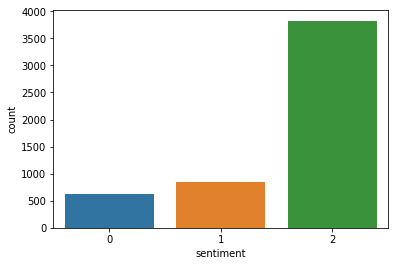

In [5]:
import seaborn as sns
sns.countplot("sentiment",data=train)


In [6]:
from collections import Counter
Counter(train.sentiment)

Counter({2: 3825, 1: 837, 0: 617})

In [7]:
reps0 = [5 if val == 0 else 1 for val in train.sentiment]
train = train.loc[np.repeat(train.index.values, reps0)]


In [8]:
train.reset_index(inplace=True, drop=True)

In [9]:
reps1 = [4 if val == 1 else 1 for val in train.sentiment]
train = train.loc[np.repeat(train.index.values, reps1)]

In [10]:
train.reset_index(inplace=True, drop=True)
train

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend come clusters As Gile...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,completely understand want try But results rep...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting targets receptors rather like Fing...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,Very interesting grand merci Now wonder lemtra...,ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results Brain Cervi...,gilenya,1
5,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results Brain Cervi...,gilenya,1
6,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results Brain Cervi...,gilenya,1
7,b227688381f9b25e5b65109dd00f7f895e838249,Hi everybody My latest MRI results Brain Cervi...,gilenya,1
8,a043780c757966243779bf3c0d11bf6eef721971,give advice Lemtrada chose Cladribine Have tho...,cladribine,2
9,be5a13376933a7f9bbf8e801c31691092f63260a,Reply posted JessZidek Hi Jess Sorry read chal...,humira,0


Counter({2: 3825, 1: 3348, 0: 3085})


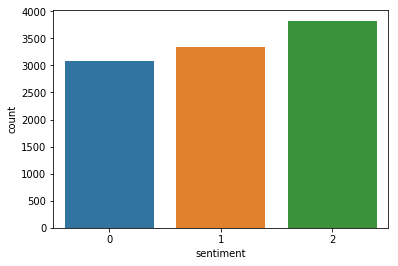

In [11]:
print(Counter(train.sentiment))
sns.countplot("sentiment",data=train)

In [12]:
test = pd.read_csv("../input/test.csv")
test['text'] = test['text'].str.replace("[^a-zA-Z]", " ")
test.text = test.text.apply(remove_stopwords)
test_id = test['unique_hash']

test.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,previously stable natalizumab switching fingol...,fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod since December way describe bett...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently shingles red spots left breast appe...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If Docetaxel week weeks week claim less harsh ...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,CC Stelara worked matter days If GI willing ju...,stelara


In [13]:
# Create databunch
data = (TextList.from_df(train, cols='text')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,patients reported serious adverse events xxwrep 4 mg no serious adverse event reported patient no new safety signals occurred compared xxup bold xxmaj study xxmaj if patients reporting xxunk stated no serious adverse event reported patient xxmaj maybe read right maybe xxunk pleased something developed xxup spms encouraging siponimod linger long body xxbos xxmaj hi everybody xxmaj my latest xxup mri results xxmaj brain xxmaj cervical xxmaj cord next xxmaj
1,xxmaj ulcerative xxmaj colitis xxmaj john xxup uc xxmaj proctosigmoiditis xxmaj rx xxmaj remicade mgs kg wks daily mgs xxup mp generic xxmaj lialda rowasa xxmaj you can not spell sucks without xxup uc xxmaj post xxmaj edited ipoop xxup pm xxup gmt xxbos xxmaj lag plus xxmaj opdivo clinical trial trial year no side effects xxmaj all tumors continue shrink fantastic xxmaj ct scan xxmaj pdl negative also xxmaj
2,attack tumors xxmaj common food additive may impact gut bacteria increase anxiety xxmaj emulsifiers many food products new study asks whether chemicals might impact physiology psychology xxmaj stool transplants super donors could cure xxmaj new research suggests fecal transplants super donors could cure host conditions ranging irritable bowel syndrome xxmaj alzheimer xxbos xxmaj hi blueberry xxmaj these two reasonable options think one important considerations xxunk question symptomatic mother xxmaj if
3,xxmaj national xxmaj heart xxmaj lung xxmaj blood xxmaj institute part xxmaj national xxmaj institutes xxmaj health xxmaj type xxmaj diabetes xxmaj type diabetes formerly called adult onset xxmaj type xxup ii non insulin dependent following characteristics xxmaj it usually occurs age affects individuals diabetes xxmaj it occurs pancreas not produce enough insulin insulin deficiency body cells not able use insulin correctly efficiently insulin resistance conditions present xxmaj glucose continues
4,feel accurate depiction xxup uc patients get versus total end cure feel though word xxunk xxup uc community xxmaj many us getting remission dream seems almost impossible worst days xxmaj achieving remission throwing cure word around excellent idea opinion know word xxmaj but xxup uc life whether currently symptoms not real reality need mentally prepared xxmaj it better hope best expect worst expect best xxunk worst xxmaj educating aware reality


**Fit the deep learning model with domain specific data
**

In [14]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

learn.unfreeze()
learn.fit_one_cycle(5, slice(2e-3/100, 2e-3))

# Save the encoder for use in classification
learn.save_encoder('fine_tuned_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,5.090526,4.897408,0.258173,00:57
1,4.370830,4.252530,0.317930,00:58
2,3.858238,3.924650,0.364429,00:58
3,3.400618,3.738964,0.395863,00:57
4,3.210666,3.696540,0.403783,00:57


epoch,train_loss,valid_loss,accuracy,time
0,3.133435,3.604147,0.417176,01:10
1,2.948673,3.439948,0.443390,01:09


**Re-fit model with classification label**

In [15]:
label_cols = ['sentiment']

test_datalist = TextList.from_df(test, cols='text', vocab=data.vocab)

data_clas = (TextList.from_df(train, cols='text', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= label_cols, classes=[0, 1, 2])
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
xxbos xxup serious xxup infections xxmaj patients treated xxmaj remicade increased risk developing serious infections may lead hospitalization death see xxmaj warnings xxmaj precautions xxmaj adverse xxmaj reactions xxmaj most patients developed infections taking concomitant immunosuppressants methotrexate corticosteroids xxmaj remicade discontinued patient develops serious infection sepsis xxmaj reported infections include xxmaj active tuberculosis including reactivation latent tuberculosis xxmaj patients tuberculosis frequently presented disseminated extrapulmonary disease xxmaj patients tested latent tuberculosis,2
xxbos da xxup lim yoo mab xxmaj index xxmaj terms xxmaj adalimumab adbm xxmaj adalimumab atto xxmaj amjevita xxmaj antitumor xxmaj necrosis xxmaj factor xxmaj alpha xxmaj human xxmaj cyltezo xxmaj human xxmaj antitumor xxmaj necrosis xxmaj factor xxmaj alpha xxmaj dosage xxmaj forms xxmaj excipient information presented available limited particularly generics consult specific product labeling xxmaj pen injector xxmaj kit xxmaj subcutaneous preservative free xxmaj humira xxmaj pen mg,0
xxbos da xxup lim yoo mab xxmaj index xxmaj terms xxmaj adalimumab adbm xxmaj adalimumab atto xxmaj amjevita xxmaj antitumor xxmaj necrosis xxmaj factor xxmaj alpha xxmaj human xxmaj cyltezo xxmaj human xxmaj antitumor xxmaj necrosis xxmaj factor xxmaj alpha xxmaj dosage xxmaj forms xxmaj excipient information presented available limited particularly generics consult specific product labeling xxmaj pen injector xxmaj kit xxmaj subcutaneous preservative free xxmaj humira xxmaj pen mg,0
xxbos xxmaj deputy xxmaj billy xxmaj kelleher asked xxmaj minister xxmaj business xxmaj enterprise xxmaj innovation number local enterprise office clients county case xxmaj dublin xxmaj dublin city xxmaj laoghaire xxmaj xxunk xxmaj fingal south xxmaj dublin years tabular form make statement matter xxmaj view answer xxmaj billy xxmaj kelleher xxmaj share xxmaj billy xxmaj kelleher xxmaj question xxmaj deputy xxmaj billy xxmaj kelleher asked xxmaj minister xxmaj business xxmaj,2
xxbos xxmaj the xxup ms xxmaj research xxmaj update made possible contributions honor xxmaj randi xxmaj carl xxmaj bushner anonymous supporter xxmaj introduction xxmaj this xxup ms xxmaj research xxmaj update designed highlight experimental medications currently investigation long term treatment multiple sclerosis xxup ms provide new clinical trial data already approved disease modifying therapies dmts describe exciting emerging areas xxup ms research xxmaj this edition xxup msaa xxup ms xxmaj,0


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.874652,0.700393,0.693320,00:45
1,0.814281,0.681764,0.706485,00:43
2,0.808821,0.660367,0.711848,00:45
3,0.768431,0.583088,0.774256,00:41
4,0.743701,0.547522,0.794247,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.663002,0.544453,0.785958,01:11
1,0.601914,0.375275,0.858118,01:23
2,0.444013,0.248712,0.911750,01:18
3,0.385212,0.185172,0.937104,01:36
4,0.333751,0.180564,0.933691,01:19


text,target,prediction
xxbos xxmaj written xxmaj january xxmaj next xxmaj let xxmaj us xxmaj try xxmaj home xxmaj ratings xxmaj rate xxmaj summary xxmaj current xxmaj average xxmaj ratings xxmaj overall quality xxmaj avg xxmaj applies topic xxmaj avg xxmaj helpful xxmaj avg xxmaj xxunk xxmaj total xxmaj avg xxmaj rating based rating xxmaj overall quality xxmaj applies topic xxmaj helpful xxmaj one best pages xxmaj yes xxmaj no xxmaj name xxmaj,2,2
xxbos xxmaj last xxmaj updated xxmaj january xxmaj share xxmaj comments xxmaj tell xxmaj friend xxmaj here editors healthday consider important developments xxmaj pharmacy xxmaj december xxmaj this roundup includes latest research news journal articles well xxup fda approvals regulatory changes likely affect clinical practice xxmaj no xxmaj effect xxup bup xxup tap xxmaj catheter xxmaj chronic xxmaj pain xxmaj after xxmaj breast xxmaj recon xxup friday xxmaj dec healthday,0,0
xxbos xxunk xxup en xxunk xxup xxunk xxunk xxunk xxup seen ak ti xxup xxunk ted xxmaj index xxmaj terms xxunk xxmaj flucelvax xxmaj quadrivalent xxmaj cell xxmaj culture xxmaj inactivated xxmaj influenza xxmaj vaccine xxmaj quadrivalent xxmaj flucelvax xxmaj quadrivalent xxmaj influenza xxmaj vaccine xxup iiv xxup iiv xxup iiv xxmaj inactivated xxmaj influenza xxmaj vaccine xxmaj influenza xxmaj vaccine xxmaj influenza xxmaj virus xxmaj vaccine xxmaj purified xxmaj,2,2
xxbos xxmaj the colon part body digestive system xxmaj the digestive system removes processes nutrients vitamins minerals carbohydrates fats proteins water foods helps pass waste material body xxmaj the digestive system made esophagus stomach small large intestines xxmaj the colon large bowel first part large intestine feet long xxmaj together rectum anal canal make last part large intestine inches long xxmaj the anal canal ends anus opening large intestine outside,0,0
xxbos xxmaj the colon part body digestive system xxmaj the digestive system removes processes nutrients vitamins minerals carbohydrates fats proteins water foods helps pass waste material body xxmaj the digestive system made esophagus stomach small large intestines xxmaj the colon large bowel first part large intestine feet long xxmaj together rectum anal canal make last part large intestine inches long xxmaj the anal canal ends anus opening large intestine outside,0,0


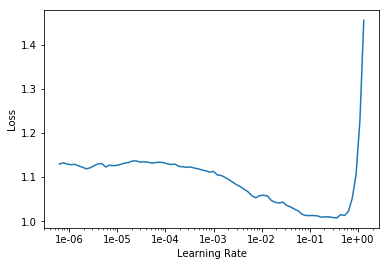

In [16]:

learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

# load the encoder saved  
learn_classifier.load_encoder('fine_tuned_enc')
learn_classifier.freeze()

# select the appropriate learning rate
learn_classifier.lr_find()

# we typically find the point where the slope is steepest
learn_classifier.recorder.plot()

# Fit the model based on selected learning rate
learn_classifier.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

learn_classifier.unfreeze()
learn_classifier.fit_one_cycle(5, slice(2e-3/100, 2e-3))

learn_classifier.show_results()

**Get predictions**

In [17]:

preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
predictions = np.argmax(preds, axis=1) 

submission = pd.DataFrame({'unique_hash': test_id})
submission = pd.concat([submission, pd.DataFrame(predictions.numpy(), columns = label_cols)], axis=1)

submission.to_csv('submission.csv', index=False)
submission.tail()

,unique_hash,sentiment
2919,ac6e60bec9162ae66effd29a0dc9ad11ff966df6,0
2920,12afabb6210825308ead9894916abdfc912d7c43,2
2921,021bb88c92a71229288304d691d53c3ff7004e4b,2
2922,9936efcb83eded79fe9454df188edd7b96c6109e,2
2923,05402df12d6769d7f38ab40e0b81464e65e1df0a,2


In [18]:
## To download the submission file without Commiting the kernel.
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "subm.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)